In [1]:
import os
import sys
sys.path.append('../')
from source.computation_support import *
from source.myGaborFunctions import *
from source.color_transformations import *
from source.graph_operations import *
# %matplotlib qt

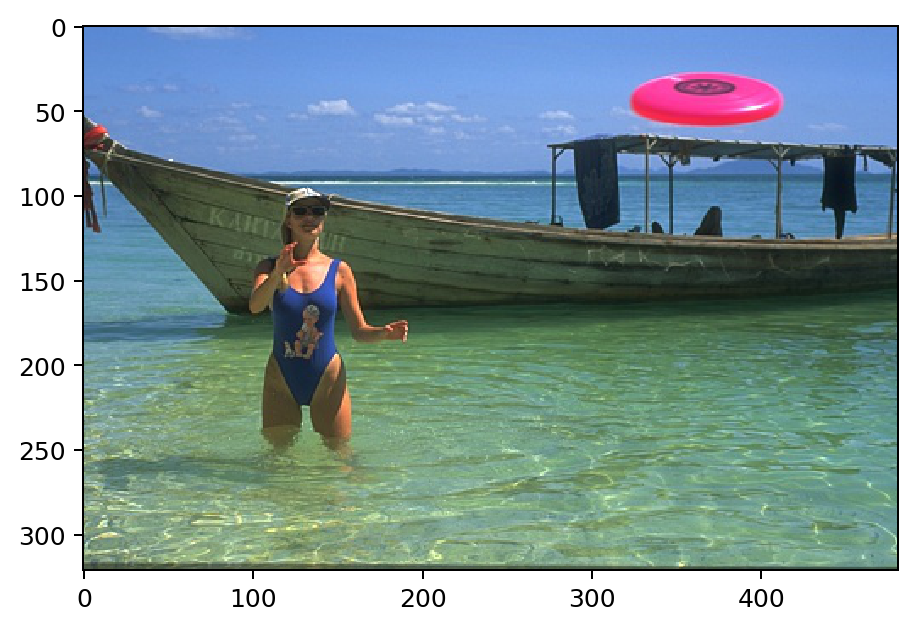

In [2]:
# Read and show input image
inDir = '../../data/images/500images/test/'
list_imgs = os.listdir(inDir)

indx = 2
img = io.imread(inDir + list_imgs[indx])
rows, cols, channels = img.shape
plt.figure(dpi=180)
plt.imshow(img)

In [3]:
print(list_imgs[indx])

81066.jpg


Text(0.5, 0.98, 'Gabor filterbank ')

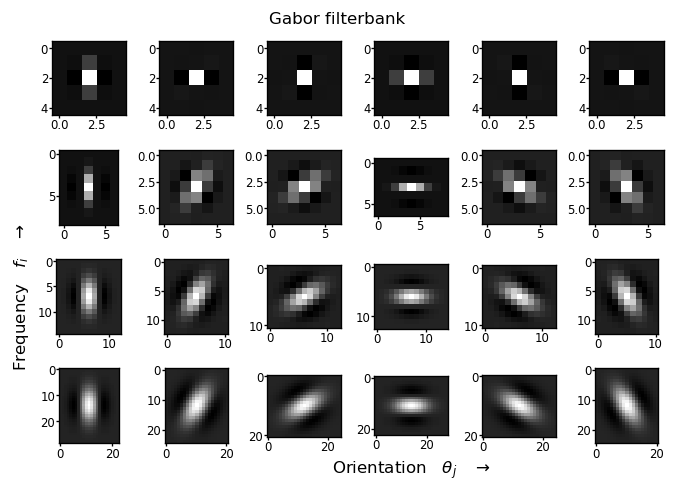

In [4]:
# Generating Gabor filterbank

min_period = 2.
max_period = 25.
fb = 1
ab = 30
c1 = 0.9
c2 = 0.9
stds = 3.0

gabor_filters, frequencies, angles = makeGabor_filterbank(min_period, max_period, fb, ab, c1, c2, stds)
n_freq = len(frequencies)
n_angles = len(angles)

# Visualization of filters
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(gabor_filters[ff][0].real, cmap='gray') #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Gabor filterbank ', fontsize=10)

In [5]:
# Image color decomposition: 2 channel complex color space

color_space = 'HS'  # HS, LAB

lum, chrom_r, chrom_i = img2complex_colorspace(img, color_space)

179.0 0.0 255.0 0.0 255.0 21.0


In [6]:
print(lum.max(), lum.min())
print(chrom_r.max(), chrom_r.min())
print(chrom_i.max(), chrom_i.min())

255.0 17.0
229.19249 -245.12173
224.7322 -135.96217


In [7]:
# print hola

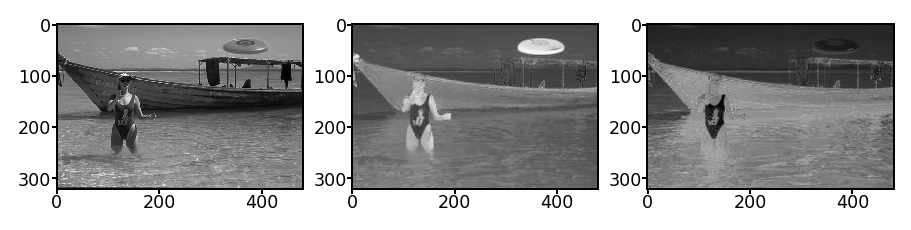

In [8]:
# lum = linear_normalization(lum, 255., 0.)
# chrom_r = linear_normalization(chrom_r, 255., 0.)#linear_normalization2(chrom_r)
# chrom_i = linear_normalization(chrom_i, 255., 0.)#linear_normalization2(chrom_i)

img_2ch = np.array((lum, chrom_r, chrom_i))

# Visulization of image in complex channel
fig, axes = plt.subplots(1, 3, dpi=180)
for ii in range(channels):
    axes[ii].imshow(img_2ch[ii], cmap='gray')
    axes[ii].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)

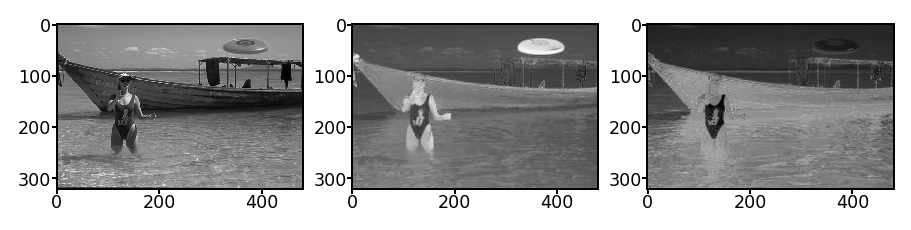

In [9]:
img_2ch_norm = normalize_img(img_2ch, rows, cols)

# Visulization of image in complex channel
fig, axes = plt.subplots(1, 3, dpi=180)
for ii in range(channels):
    axes[ii].imshow(img_2ch_norm[ii], cmap='gray')
    axes[ii].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)
    

# # Visulization of image in complex channel
# fig, axes = plt.subplots(1, 3, dpi=180)
# for ii in range(channels):
#     axes[ii].imshow(img_2ch[ii], cmap='gray')
#     axes[ii].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)

In [10]:
# Filtering of 2 channel complex image 

r_type = 'L2'  # 'real'
gsmooth = True
opn = True
selem_size = 2
num_cores = -1

img_complex = img_2ch_norm

filter_responses = np.array(Parallel(n_jobs=num_cores, prefer='processes')(
        delayed(applyGabor_filterbank)(img_channel, gabor_filters, resp_type=r_type, smooth=gsmooth,
                                       morph_opening=opn, se_z=selem_size) for img_channel in img_complex))

g_responses_norm = normalize_img(filter_responses, rows, cols) # Heinsenberg normalization
# g_responses_norm = filter_responses # NO Heinsenberg normalization


print(np.sum(g_responses_norm**2) / (rows*cols))

1.0000000000000004


Text(0.5, 0.98, 'Luminance Gabor responses')

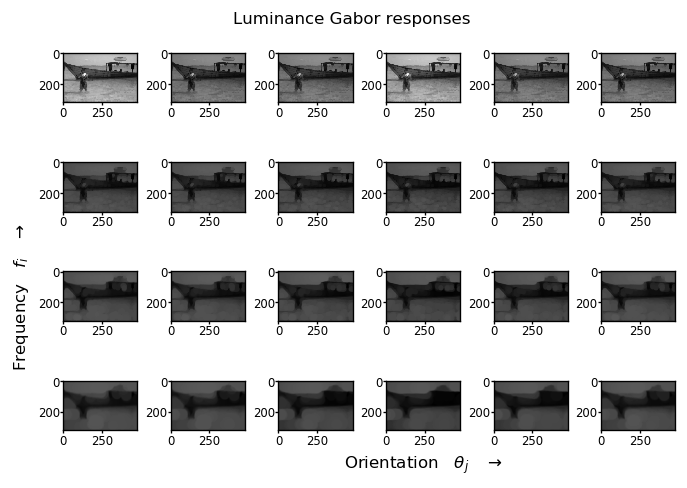

In [11]:
# Visualization of responses
# Luminance
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(g_responses_norm[0][ff], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Luminance Gabor responses', fontsize=10)

Text(0.5, 0.98, 'Chrominance Re Gabor responses')

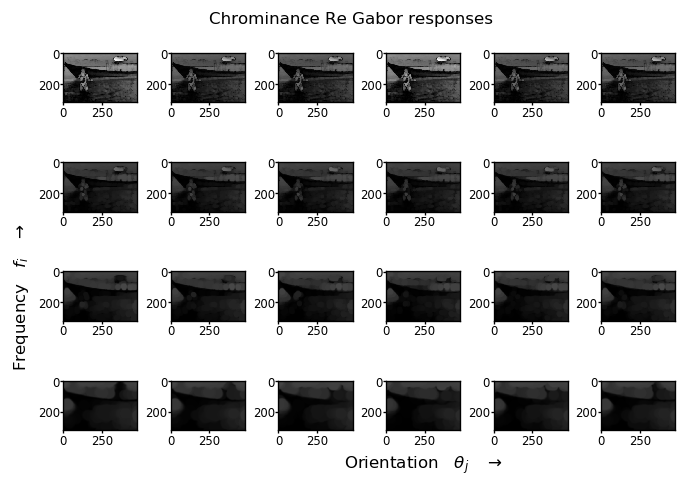

In [12]:
# Visualization of responses
# Chrominance real
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(g_responses_norm[1][ff], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Chrominance Re Gabor responses', fontsize=10)

Text(0.5, 0.98, 'Chrominance Im Gabor responses')

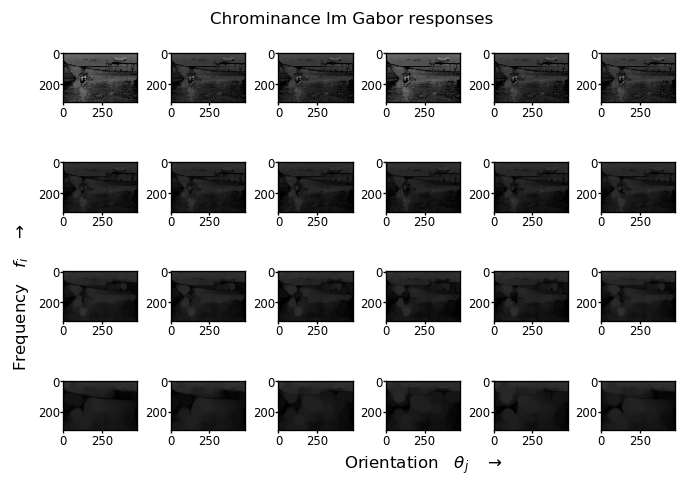

In [13]:
# Visualization of responses
# Chrominance imag
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(g_responses_norm[2][ff], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Chrominance Im Gabor responses', fontsize=10)

In [14]:
# print hola

In [15]:
# Computing Graphs the images
kneighbors = 4

edges_info = get_pixel_graph(kneighbors, (rows, cols, channels))
edges_index, neighbors_edges = edges_info

In [16]:
ground_distance = cost_matrix_texture(n_freq, n_angles, fb)
g_energies = g_responses_norm.reshape(channels, n_freq*n_angles, rows*cols).T

g_energies_lum = g_energies[:, :, 0]
g_energies_cr = g_energies[:, :, 1]
g_energies_ci = g_energies[:, :, 2]

''' Updating edges weights with similarity measure (OT/KL) '''
num_cores = multiprocessing.cpu_count()
weights_lum = np.array(Parallel(n_jobs=int(num_cores))
                       (delayed(em_dist_mine)(np.float64(g_energies_lum[e]), ground_distance) for e in edges_index))

weights_cr = np.array(Parallel(n_jobs=int(num_cores))
                      (delayed(em_dist_mine)(np.float64(g_energies_cr[e]), ground_distance) for e in edges_index))

weights_ci = np.array(Parallel(n_jobs=int(num_cores))
                      (delayed(em_dist_mine)(np.float64(g_energies_ci[e]), ground_distance) for e in edges_index))

In [17]:
gradient_lum = np.empty((rows * cols), dtype=np.float32)
gradient_cr = np.empty((rows * cols), dtype=np.float32)
gradient_ci = np.empty((rows * cols), dtype=np.float32)

for pp in range(rows * cols):
    gradient_lum[pp] = np.max(weights_lum[neighbors_edges[pp]])
    gradient_cr[pp] = np.max(weights_cr[neighbors_edges[pp]])
    gradient_ci[pp] = np.max(weights_ci[neighbors_edges[pp]])

In [18]:
gradient_lum.max()

1.8199971

In [19]:
gradient_cr.max()

2.1705966

In [20]:
gradient_ci.max()

1.7548876

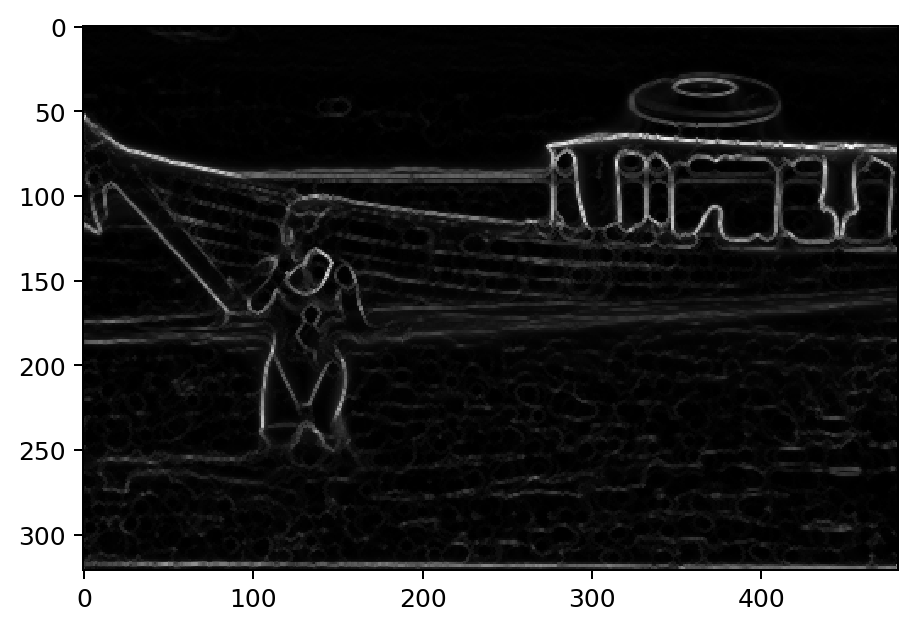

In [21]:
plt.figure(dpi=180)
plt.imshow(gradient_lum.reshape((rows, cols)), cmap='gray')

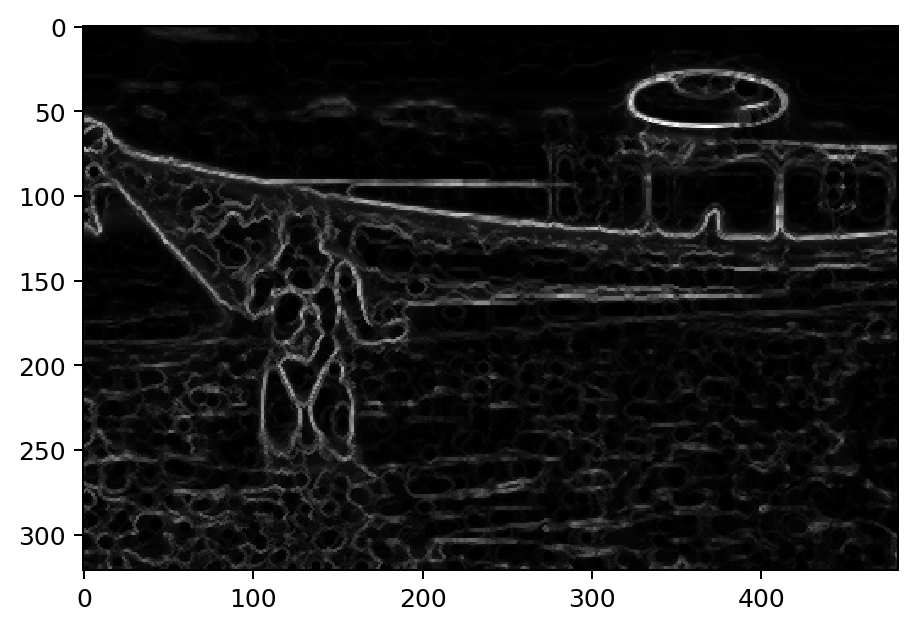

In [22]:
plt.figure(dpi=180)
plt.imshow(gradient_cr.reshape(rows, cols), cmap='gray')

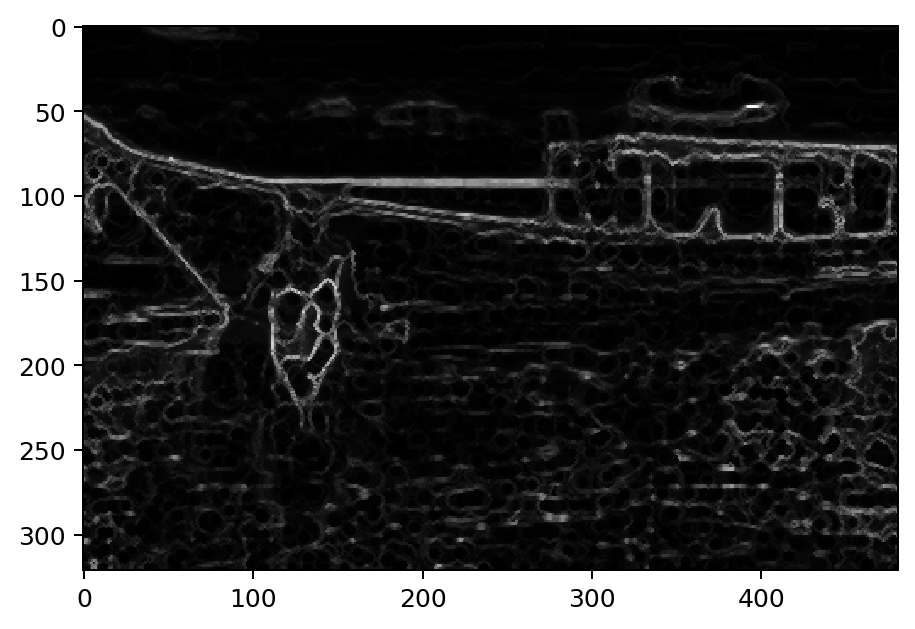

In [23]:
plt.figure(dpi=180)
plt.imshow(gradient_ci.reshape(rows, cols), cmap='gray')

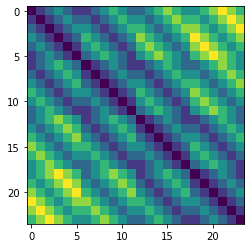

In [24]:
plt.imshow(ground_distance)

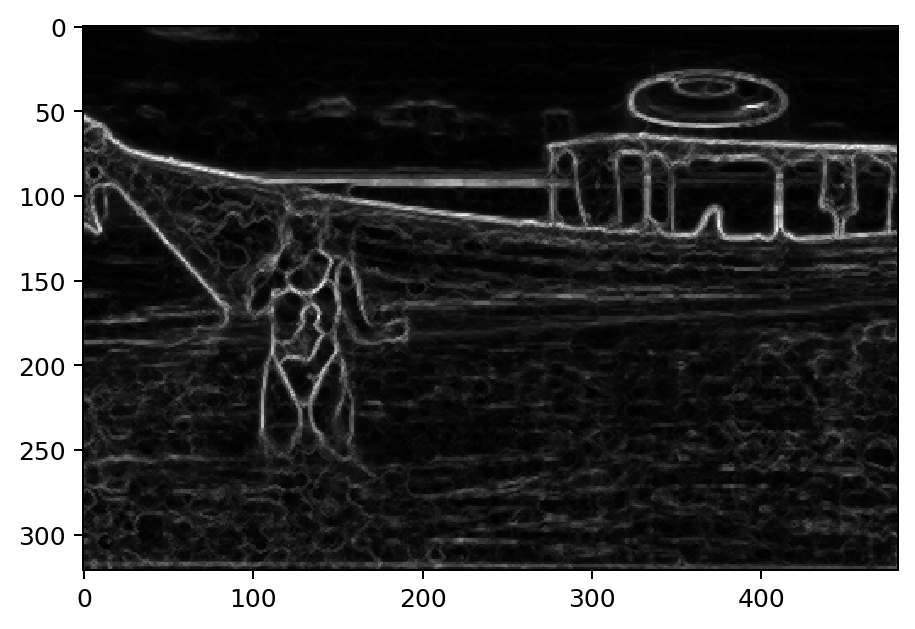

In [25]:
plt.figure(dpi=180)
plt.imshow((gradient_lum+gradient_cr+gradient_ci).reshape(rows, cols), cmap='gray')
plt.savefig(list_imgs[indx])